# Learning about Recommender Systems

The field of Recommender Systems (RecSys) is a broad area that combines Machine Learning algorithmns, Business Sense, User Experience, Big Data Processing and Domain Field to generate useful recommendations to people in many different products and services.

Many aspects of RecSys have been covered and discussed through [this course](https://www.udemy.com/course/building-recommender-systems-with-machine-learning-and-ai/) and I'm using this document to summarize the main points and techniques learned in a self experiment** with `movielens` data.

> I'm going to create my own user and rate some items that I've seen so I can subjectively evaluate the final recommendations

Here are the topics of this document


### 1. Recommender Systems Purposes
* Whey they exists in the first place?
* Should we be focusing on profitable or pure personalized recommendations?

### 2. The main concerns we should be aware of
* Type of data used to learn the user's preferences
* How to measure recommendations quality
* Diversity: User's Bubbles
* Serendipity: Novelty effect
* Reliability: Why should users trust in your recommendations? 
* Coverage: How many items from the product's catalog are being recommended? 
* Churn: How often do recommendations change?  
* Resposiveness: How quickly does new user behavior influence your recommendations? 
* Cold Start Problem: Managing new items and/or users in the system
* Temporal Effect: Your recent data is a stroger evidence of your preferences.
* Frauds and Outliers: Bots, fake users and internal tests can affect your recommendations.
* Stoplists/Whitelists: Is there any item that you should or shouldn't be recommending regardless of the algorithm's predictions? 

### 3. The Experiment
* Creating my own user to use on the experiment
* Testing several different approaches

### 4. Evaluation
* Trying many different metrics to evaluate the recommeder systems from different aspects

### 5. Hybrid Recommender
* Hybrid approach considering the best algorithms tested

### 6. Conclusions
* Final thoughts after all tests

### 7. References
* Some additional references, posts and courses

## 1. Recommender Systems Purposes

Recommender Systems help people to discover and/or find out items that they might like from a huge product/item catalog (Paradox of choice), by extracting their preferences from data to generate personalized recommendations. 
Imagine a platform like Netflix or Spotify without recommendations: Do you think it would be easy to find something you like without bigger effort? Even if you know what you like (some people don't), sometime you will be stucked in your own "bubble" and you will never get to know new cool things that you didn't even know that exists. So recommender systems are happy to provide recommedations that you already know and like, but they get even happier when they can find out something useful that you didn't know before!

From user's perpecptive a recommender system is good because it can find the best items that fit to their preferences and from the company standpoint it is a way to generate more reveue by exposing users to items from the catalog that they are more likely to buy

#### So should we be focusing on profitable items or pure personalized recommendations? 

Actually we can use some financial information about the item such as its profit margin as a "tiebreaker" or a refinement of the final list of recommendations (prescriptive phase) but we need to be careful about this approach because if we recommend only expensive items to the users, they might have the felling we are not trying to improve and personalize their experience but only making money at their expense. 

Therefore a mix of personalized items, profitable items, trending items, new items, items on offer and any other kind of items we can think of is what we aim to achieve with good recommender systems and it is actually the challenging (and fun) part of building it!

## 2. The main concerns we should be aware of 

### 2.1 - Type of data used to learn the user's preferences
The type of data we use to build recommendations is one of the most important point that we should take into account, as it is the core of any preference we can extract from users. We can either use `explicit` or `implicit` users signals/feedback data and each one has their pros and cons

#### Explicit
* **Pros:**
    * We know what each user likes and doesn't like and depending on the scale we can extract **how much** they like or not a particular item (e.g. five Stars ratings)
* **Cons:**
    * Sparse data issues as users tend to not rating every item consumed. If we compare the rated items from each user to the amount of items available, we have many missing values and that is an issue in user's preferences calculations.

#### Implicit
* **Pros:**
    * It is less sparse than explicit data if we are properly tracking user's behavior 
    * Less biased as it is not something the users are explicitly **saying** they like or not, but actually showing us with data! (Data is the customer's voice in a large scale).
* **Cons:**
    * We only know what the users like/consumed: Unlike explict data, users are not saying whether they like or not anything, and we cannot assume that an missing item hasn't been consumed yet because user doesn't like it or simply doesn't know it.
    * Some signals could be noisy like `click` data as it is common to accidentally click on something that we didn't want to or even when is not a real person doing it like nots, web scrapers, etc.
    
> For implicit data maybe it would be necessary to perform some transformations like square or square root in order to emphasize some signals over another (e.g. real interest clicks x misleading clicks). Therefore by transforming the data, some noisy trackings could be automatically ignored in the calculations keeping only the useful signals.


### 2.2 - How to measure recommendations quality?

This is one of the most challenging part when it comes to RecSys and there are many current reaserches on this field. 

Traditional Machine Learning Evaluation techinques are not as efficient on most of recommender systems because, in fact optmizing for prediction's accuracy would only make it possible to predict items that users have already consumed, but <u>helping users to find new items</u> they might like is the main goal.

This part from [this post](https://gab41.lab41.org/recommender-systems-its-not-all-about-the-accuracy-562c7dceeaff#.5exl13wqv) ilustrates very well this point:

"Imagine you are using a travel recommender system. Suppose all of the recommendations it gives to you are for places you have already traveled to. Even if the system were very good at ranking all of the places you have visited in order of preference, this still would be a poor recommender system. Would you use such a system?"

There are some ways though, inherited from `information retrieval` field for measuring **rank quality** and it has been a commom way to compare and evaluate RecSys since the industry realized that optimizing for accuracy of ratings predicition is not the best approach to generate good recommendations, so they stoped looking for `ratings predictions` and started to optimize for `Top N Recommendations`.

> Predicting ratings is still an important piece of the whole system as it can accurately understand people's tastes from the items consumed, however having (only) a good rating predictor doesn't mean that it's a good recommender.

We can split the evaluation into 2 parts:

1. **OFFLINE:** When you evaluate your recommendations using your own data (i.e. train and test splits) which is very close to others Machine Learning evaluation approaches.

2. **ONLINE:** Using AB Tests/Field Tests to evaluate your recommendations by showing them to real users and measuring the outcomes.

They are not independent of each other and it would be good to go ONLINE only after passing the OFFLINE checks. Besides you can use different offline metrics according to your RecSys goals and some of these metrics are listed below:

* **Diversity:** We need to explore and exploit recommendations so we can burst the user's bubles a little bit and explore new tastes. So diversity is as important metric to track and is one way to calculate this is by the average of `1 - the sum of item similarities score` of each user's recommendation list (Intra-List-Similarity).
* **Coverage:** This is the metric that calculates the percentage of items/users are being recommended. RecSys are supposed to have good recommendations for every user and also explore all available content, so it could be calculated as the number of distinct items/users recommended divided by the total of items/users available.
* **Serendipity:** This is the level of **surprising** recommendations the users are receiving on average. The calculations are similar to Diversity Intra-List-Similarity mentioned above, but it compares recommended items to items from **users history** rather than similarities between items within the recommendation list, so we can check whether the recommendations are too close to consumed items (hence less surprising stuff).
* **Novelty:** Mean popularity rank of recommended items. It is related to the above metric as both are trying to measure how obvious the recommendations are, having the goal of explore and exploit the items in the catalog. If we think that usually there are popular items and niche items in a product/item catalog (Long Tail), novelty would show whether the recommendations are being generated mostly around popular items on average.

> The balance between known (or popular) items and novelty is something to be careful about! Users tend to trust more in the recommendations when they are familiar with at least some of the items listed, so too much novelty could make users suspect that something is wrong even when is not.

#### Some useful metrics...

* **Hit Rate**: If the TOP N list (where N is a pre-defined number like 5 or 10) has something the user has already consumed/liked, it could be considered a "hit", so it could be calculated as:

### $\frac{SUM(hits)}{Users}$

> We also could use Leave-One-Out approach which is similar to Hit-Rate but leaving one random item out of the testset and measure how often this excluded item is recommended. It is like a cross-validation approach.

* **Average Reciprocal Hit Rate (ARHR)**: It is also similar to Hit Rate but accounts for the position of the items, so it penalizes relevant items when they are in lower positions.

### $\frac{SUM(Reciprocal Rank)}{Users}$

Where Reciprocal Rank (RR) is like:

Rank 1 = RR 1<br>
Rank 2 = RR 1/2<br>
Rank 3 = RR 1/3<br>

* **Ranking Metrics:** Many ranking problems outside of RecSys also use some metrics to evaluate the Top N from a given list of items. Metrics such as `precision@K`, `recall@K`, `f1-score@K`, `MAP` and `NDCG` are great for those ranked lists and more detailed explanations can be found on [this](https://queirozf.com/entries/evaluation-metrics-for-ranking-problems-introduction-and-examples) post.

Here are some implementations from `sklearn` of [MAP](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html) and [NDCG](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ndcg_score.html) scores

### 2.3 - Some additional things....

* **Reliability:** Why should users trust in your recommendations? This is something that Amazon and others usually try to solve by explaning **why** a particular recommendation are presented there, whether it is based on the user's last purchase, last viewed or accessed product and it also enables them to fix and improve the recommendations by removing these items from their list. For example: It could be a one-time gift that does not represent the user's actuall taste.
* **Churn:** How often do recommendations change for the users? If the same recommendation is repeatedly appearing for the same user even when he/she has not interacted with it, maybe we could be using this slot in a better way by giving some space for other recommendations. This would be a great chance to explore more items from the catalog and try new tastes for the users. 
* **Resposiveness:** How quickly does new user behavior influence your recommendations? The system should be robust enough to not change everything just because a small change has happened in user's behavior (e.g. weekends x working days) but it also should be sensitive enough to capture users's major changes/new interactions as quickly as possible. It could be related to how often the calculations are made (Nightly Job Runs, Once in a week, etc).
* **Context:** Some external context could affect the user's behavior and it could be used as an input to the system so it can improve user's experience. For example: Depending on the device used, weather, weekday, seasonality and special dates, the system could adapt its recommendations to something that makes more sense in that context. So when you access your Netflix from your mobile device, maybe you are not willing to watch a long movie and could be looking for some short episode of your favorite show instead.


#### Cold Start Problem

Recommender systems suffer from <u>Cold Start Problem</u> which is when you have a new user or item and don't have enough data yet to provide any useful recommendations. 

In the case of new user, there are some discussions about how to deal with it like using `non-personalized recommendations` (Top Sellers, Trending Topics, etc). Popular items are popular for some reason right? So they should get attention of a larger group of people. 

We also can use some `semi-personalized` recommendations like getting user's geo-location from their IP and figure out where they are coming from and show popular items considering their regions for example, or we can simply ask them direclty some useful information or ratings that he/she would give for a particular item during the sign-up process, so we can assign them to a certain group (cluster) of similar people and generate group-based recommendations.

Lastly content-based recommendations, exploration techniques like `multi armed bandit` and deep learning with RNNs approaches could be useful specially considering the user's current activies and visited items. Depending on the context it could do a great job, even when the user is not logged on your website/platform. 

For New Items the issue is a little bit different because it could take a long time until people start consuming it and hence it starts to show up on the recommendation lists, but by having an entire session of your UI only for recent added items can help you to address this. Another approach that could help on this could be randomly mixing some recent items into the final recommendation lists, so if we have 10 slots to fill up with recommendations, we could use 8 of them and let the remaining two for recent items that are more close to the user's taste.

All of this could be tested in different versions of your recommender with ONLINE tests to check which one is the best for each business case.


#### Temporal Effect: 

Your recent data is a stroger evidence of your current preferences, so applying some `decay function` that exponentially drops depending on the data recency could improve your recommendations quality, specially if the content are very time-sensitive as the user's tastes might change/evolve over time.

A simple and practical `decay function` could be: 

### $\frac{interaction value -1}{(time(in days/month/year) + 2)^G}$

Where G is soome gravity constant (I usually use 1.8) and interaction value could be both implicit or explicit values.

#### Frauds and Outliers: 

Bots, web crawlers, fake users and Internal Tests can affect the recommendations and similiarities calculations. One way to prevent this is removing *outliers* from the training set and/or check how much you can trust in a certain user's ratings by assessing his/her knowledge about the rated item, for example:

1. Trying to keep only consumed items in the data if the UI/System allows users rate unseen movies for example. For implicit data it would be good to perform some `sanity check` to evaluate if the tracking data are correctly capturing the users interactions.
2. Implementing some mechanism to ask users things about the item that we already know the answer in order to check the user's knowlegde about the item and also confirm whether he/she is actually a real user, specially in their first interactions. Therefore a level of trust could be calculated based on the answers and used as a weight in this user's ratings so we can refine our similarities calculations as well as the recommendations generated.


#### Stoplists/Whitelists: 
Is there any item that you should or shouldn't be recommending regardless of the algorithms predictions? Maybe so..
That's why we can have a stoplist/blacklist and a whiteist/wishlist to control those things.

Unethical content like: Porn, Illegal, Cultural matters, Political questions, you name it. For any of these contents, a deeper analysis might be worth. Another example could be an online drugstore recommender that cannot suggest any controled medicine, so these items should be included in a stoplist.

The opposite is also true: Is there something the company wants to promote like a new original movie from Netflix or free books ads on Amazon? This could be included in recommendations even when is not part of the calculations, so it is kind of a "must have list". 

## 3. Experiment

In this part I'm going to perform experiments and discussions about the main algorithms currently used in recommender systems field in addition to test a hybrid approach after we have some intuition and the experiment's outcomes of the different algorithms tested. The `movielens20K` dataset will be used to create a movie recommender (as usual practice on recommender system experiments) and I'm going to create "myself" to be able to subjectively evalute the items recommended with some of the evaluation metrics mentioned earlier.

###  3.1 - Creating myself =)
I'm going to check some of the movies available on the movielens dataset that I've seen before and rate them according to my own taste, so I can use myself as a subject for this experiment

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

In [2]:
df_raw_ratings = pd.read_csv('../datasets/ml-latest-small/ratings.csv')
df_movies = pd.read_csv('../datasets/ml-latest-small/movies.csv')

In [3]:
df_raw_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
my_id = df_raw_ratings['userId'].max()+1
max_timestamp = df_raw_ratings['timestamp'].max()

print(f"My ID is {my_id}")

My ID is 672


In [6]:
my_ratings = [(my_id, 673, 'Space Jam (1996)', 3.5),
              (my_id, 1274, 'Akira (1988)', 3.0),
              (my_id, 1580, 'Men in Black (a.k.a. MIB) (1997)', 3.0),
              (my_id, 1591, 'Spawn (1997)', 3.0),
              (my_id, 1682, 'Truman Show, The (1998)', 4.5),
              (my_id, 1917, 'Armageddon (1998)', 5.0),
              (my_id, 2571, 'Matrix, The (1999)', 5.0),
              (my_id, 3793, 'X-Men (2000)', 4.0),
              (my_id, 4643,'Planet of the Apes (2001)', 4.0),
              (my_id, 5219, 'Resident Evil (2002)', 4.5),
              (my_id, 5445, 'Minority Report (2002)', 5.0),
              (my_id, 5349, 'Spider-Man (2002)', 3.5),
              (my_id, 7254, 'The Butterfly Effect (2004)', 5.0),
              (my_id, 82461, 'Tron: Legacy (2010)', 4.0),
              (my_id, 89745, 'Avengers, The (2012)', 5.0),
              (my_id, 122892, 'Avengers: Age of Ultron (2015)', 5.0),
              (my_id, 122920, 'Captain America: Civil War (2016)', 5.0),
              (my_id, 4720, 'Others, The (2001)', 4.0),
              (my_id, 7361, 'Eternal Sunshine of the Spotless Mind (2004)', 5.0),
              (my_id, 47099, 'Pursuit of Happyness, The (2006)', 5.0),
              (my_id, 58803, '21 (2008)', 4.5),
              (my_id, 367, 'Mask, The (1994)', 3.5),
              (my_id, 33794, 'Batman Begins (2005)', 3.0),
              (my_id, 110, 'Braveheart (1995)', 3.0),
              (my_id, 43871, 'Firewall (2006)', 3.5),
              (my_id, 106782, 'Wolf of Wall Street, The (2013)', 4.0),
              (my_id, 148626, 'Big Short, The (2015)', 5.0)]

In [7]:
print(f"{len(my_ratings)} movies have been rated to this experiment")

27 movies have been rated to this experiment


In [8]:
df_my_ratings = pd.DataFrame(my_ratings, columns=['userId', 'movieId', 'title', 'rating'])

In [9]:
df_my_ratings.drop('title', axis=1, inplace=True)

In [10]:
df_my_ratings['timestamp'] = max_timestamp

In [11]:
df_my_ratings.head()

,userId,movieId,rating,timestamp
0,672,673,3.5,1476640644
1,672,1274,3.0,1476640644
2,672,1580,3.0,1476640644
3,672,1591,3.0,1476640644
4,672,1682,4.5,1476640644


In [12]:
df_ratings = pd.concat([df_my_ratings, df_raw_ratings])

In [13]:
test_user = my_id

### 3.2 - Pre-Processing

### 3.2.1 - Weighting Ratings according to their aging

In [14]:
df_aux_raw = df_ratings.copy()

In [15]:
df_aux_raw['timestamp'] = df_aux_raw['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [16]:
df_max_rating_users = df_aux_raw[['userId', 'timestamp']].groupby('userId').max().reset_index()
df_max_rating_users.columns = ['userId', 'last_review_date']

In [17]:
df_aux_raw = df_aux_raw.merge(df_max_rating_users, on='userId')

In [18]:
df_aux_raw['diff_date'] = df_aux_raw['last_review_date'] - df_aux_raw['timestamp']
df_aux_raw['diff_date'] = df_aux_raw['diff_date'].apply(lambda x: np.ceil(x.days/30.0))

In [19]:
def get_weight_rating(rating, days):
    return rating / np.power(days+1, 0.1)

In [20]:
df_aux_raw['weighted_rating'] = df_aux_raw.apply(lambda x: get_weight_rating(x['rating'], 
                                                                             x['diff_date']), axis=1)

In [21]:
df_aux_raw.head()

,userId,movieId,rating,timestamp,last_review_date,diff_date,weighted_rating
0,672,673,3.5,2016-10-16 15:57:24,2016-10-16 15:57:24,0.0,3.5
1,672,1274,3.0,2016-10-16 15:57:24,2016-10-16 15:57:24,0.0,3.0
2,672,1580,3.0,2016-10-16 15:57:24,2016-10-16 15:57:24,0.0,3.0
3,672,1591,3.0,2016-10-16 15:57:24,2016-10-16 15:57:24,0.0,3.0
4,672,1682,4.5,2016-10-16 15:57:24,2016-10-16 15:57:24,0.0,4.5


In [22]:
df_ratings = df_aux_raw[['userId', 'movieId', 'weighted_rating', 'timestamp']].copy()
df_ratings.columns = ['userId', 'movieId', 'ratings', 'timestamp']

### 3.2.2 - Movies Genres

In [23]:
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

In [24]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.split('|'))

In [26]:
movies_list = []
for movie in df_movies.values:
    for genre in movie[2]:
        movies_list.append((movie[0], movie[1], genre))

In [27]:
df_movies_aux = pd.DataFrame(movies_list, columns = ['movieId', 'title', 'genre'])

In [28]:
df_movies_aux['flg_genre'] = np.ones(len(df_movies_aux))

In [29]:
df_movies_aux.head()

,movieId,title,genre,flg_genre
0,1,Toy Story (1995),Adventure,1.0
1,1,Toy Story (1995),Animation,1.0
2,1,Toy Story (1995),Children,1.0
3,1,Toy Story (1995),Comedy,1.0
4,1,Toy Story (1995),Fantasy,1.0


In [30]:
df_movies_pvt = df_movies_aux.pivot_table(index=['movieId'],
                                          columns=['genre'],
                                          values=['flg_genre'],
                                          aggfunc='max').fillna(0.0)

In [31]:
df_movie_sim = 1 - pairwise_distances(df_movies_pvt, metric='cosine')

In [32]:
df_movie_sim = pd.DataFrame(df_movie_sim, index=df_movies_aux['movieId'].unique(), 
                            columns=df_movies_aux['movieId'].unique())

In [33]:
df_movie_sim.head()

,1,2,3,4,5,6,7,8,9,10,...,161830,161918,161944,162376,162542,162672,163056,163949,164977,164979
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.0,0.316228,0.632456,0.0,0.258199,...,0.000000,0.223607,0.00000,0.00000,0.000000,0.258199,0.447214,0.0,0.447214,0.0
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.288675,0.00000,0.00000,0.000000,0.333333,0.577350,0.0,0.000000,0.0
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.500000,0.408248,0.000000,0.0,0.707107,0.0
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.0,0.816497,0.000000,0.0,0.000000,...,0.333333,0.000000,0.57735,0.57735,0.408248,0.666667,0.000000,0.0,0.577350,0.0
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,1.000000,0.0


In [34]:
df_movie_rating_pvt = df_ratings.pivot(index='movieId',
                                       columns='userId',
                                       values='ratings').fillna(0.0)
df_movie_ratings_sim = pairwise_distances(df_movie_rating_pvt,metric='cosine')

In [35]:
df_movie_ratings_sim = pd.DataFrame(df_movie_ratings_sim,
                                    columns=df_ratings['movieId'].unique(),
                                    index=df_ratings['movieId'].unique())

## 3.3 - Calculating Recommendations

### 3.3.1 - Item-Item Colaborative Filtering

The first thing we're going to try is the weighted average score using two kinds of item's similarity to come up with recommendations.

The difference is on how we calculate the movies similarities, either based on their genres or ratings (which is something like: "people who liked this movie also like this one")

In [36]:
# Getting the items I liked (greater or equal to 4 stars) and the respective ratings
test_users_ratings = df_ratings[(df_ratings['userId'] == test_user) &
                               (df_ratings['ratings'] >= 4)][['ratings','movieId']]

In [37]:
def get_item_item_score(user, item, df_sim, k=10):
         
    user_ratings = test_users_ratings.copy()
    
    if item in df_sim.index:
        user_ratings['sim'] = user_ratings['movieId'].apply(lambda x: df_sim.loc[item,x])
    
        ratings = user_ratings.sort_values(by=['sim'], ascending=False)[:k]

        score = 0
        total_sim = 0

        for rating, movie, sim in ratings.values:
            score += rating * sim
            total_sim += sim

        return score / total_sim
    else:
        return 0.0
    

In [38]:
#Experiment 1 - Item Item based on genres similarity 
exp_1 = df_movies['movieId'].apply(lambda x: get_item_item_score(test_user, x, df_movie_sim, 10))

In [39]:
#Experiment 1.1 - Item Item based on ratings similarity 
exp_1_1 = df_movies['movieId'].apply(lambda x: get_item_item_score(test_user,x, df_movie_ratings_sim, 10))

In [40]:
df_exp_1 = pd.DataFrame(exp_1.values, index=df_movies['movieId'], columns=['sim'])
df_exp_1_1 = pd.DataFrame(exp_1_1.values, index=df_movies['movieId'], columns=['sim'])

In [41]:
## Removing seen movies from the final recomendations
user_seen_movies = df_ratings[df_ratings['userId'] == test_user]['movieId'].unique().tolist()

df_exp_1.loc[user_seen_movies, 'sim'] = 0.0
df_exp_1_1.loc[user_seen_movies, 'sim'] = 0.0

In [42]:
recs_exp_1 = df_exp_1.sort_values('sim',ascending=False)[:10].index.tolist()
recs_exp_1_1 = df_exp_1_1.sort_values('sim',ascending=False)[:10].index.tolist()

In [43]:
df_movies[df_movies['movieId'].isin(recs_exp_1)]

,movieId,title,genres
707,880,"Island of Dr. Moreau, The (1996)","[Sci-Fi, Thriller]"
1194,1479,"Saint, The (1997)","[Action, Romance, Sci-Fi, Thriller]"
2773,3474,Retroactive (1997),"[Sci-Fi, Thriller]"
2916,3659,Quatermass 2 (Enemy from Space) (1957),"[Sci-Fi, Thriller]"
3146,3937,Runaway (1984),"[Sci-Fi, Thriller]"
3913,5054,Brainstorm (1983),"[Sci-Fi, Thriller]"
4194,5544,Time After Time (1979),"[Sci-Fi, Thriller]"
7150,65642,"Timecrimes (Cronocrímenes, Los) (2007)","[Sci-Fi, Thriller]"
7681,82095,Skyline (2010),"[Sci-Fi, Thriller]"
8804,127096,Project Almanac (2015),"[Sci-Fi, Thriller]"


In [44]:
df_movies[df_movies['movieId'].isin(recs_exp_1_1)]

,movieId,title,genres
128,149,Amateur (1994),"[Crime, Drama, Thriller]"
220,248,Houseguest (1994),[Comedy]
268,300,Quiz Show (1994),[Drama]
326,362,"Jungle Book, The (1994)","[Adventure, Children, Romance]"
390,441,Dazed and Confused (1993),[Comedy]
1026,1272,Patton (1970),"[Drama, War]"
1060,1307,When Harry Met Sally... (1989),"[Comedy, Romance]"
1936,2427,"Thin Red Line, The (1998)","[Action, Drama, War]"
2135,2668,Swamp Thing (1982),"[Horror, Sci-Fi]"
6539,48516,"Departed, The (2006)","[Crime, Drama, Thriller]"


Despite I'm not familiar with many of the titles recommended, the second experiment (based on ratings similarity) seems more reasonable to me, as it's mixing different types but yet correlated movies.

Let's check some others techniques next..

### 3.3.2 - Content Based - Customer Profile by Genre

With content base approach we can use `genre information` as features to approximate users tastes to their corresponding movies, by creating a "genre profile" and measure the distance between this profile and each available movie in the catalog. It is like we are representing both users and movies on the same hyperplane which is genre in this case, so we can check which movies are close to user's profile on this plane.

I'll be using my own profile to check the final results

In [45]:
#Building customer profile based on genre information
df_customer_profile = df_movies_aux[['movieId',
                                     'genre']].merge(df_ratings, on='movieId')

In [46]:
df_customer_profile_pvt = df_customer_profile[['userId',
                                               'genre',
                                               'ratings']].groupby(['userId',
                                                                    'genre']).sum().reset_index()

In [47]:
df_customer_profile_pvt = df_customer_profile_pvt.pivot_table(index='userId',
                                                              columns = 'genre',
                                                              values='ratings').fillna(0)

In [48]:
# def get_user_item_distance(u):
    
#     sims = []
#     u_aux = u / u.sum()
    
#     print(u_aux)
    
#     for m in df_movies_pvt.values:
#         m_aux = m / m.sum()
#         sim = cosine_similarity([u_aux], [m_aux])
#         sims.append((sim[0][0]))
    
#     return sims

In [49]:
def get_user_item_distance(u):
    
    sims = []
    u_aux = u / u.sum()
    m_aux = df_movies_pvt / df_movies_pvt.sum()
    
    sims = np.dot(u_aux, m_aux.T) 
    return sims

In [50]:
def content_based_recommendation(user, df_ratings, k=10):
    
    user_seen_movies = df_ratings.set_index('userId').loc[user]['movieId'].unique()
    
    exp_2 = get_user_item_distance(df_customer_profile_pvt.loc[user].values)
    
    
    recs_exp_2 = pd.DataFrame(exp_2, 
                          index=df_movies_pvt.index,
                          columns = ['sim']).nlargest(k, columns=['sim']).index
    
    
    return df_movies[(df_movies['movieId'].isin(recs_exp_2)) & ~(df_movies['movieId'].isin(user_seen_movies))]
    

In [51]:
content_based_recommendation(test_user, df_ratings)

,movieId,title,genres
4603,6365,"Matrix Reloaded, The (2003)","[Action, Adventure, Sci-Fi, Thriller, IMAX]"
4880,6934,"Matrix Revolutions, The (2003)","[Action, Adventure, Sci-Fi, Thriller, IMAX]"
6691,52722,Spider-Man 3 (2007),"[Action, Adventure, Sci-Fi, Thriller, IMAX]"
7004,60684,Watchmen (2009),"[Action, Drama, Mystery, Sci-Fi, Thriller, IMAX]"
7526,77561,Iron Man 2 (2010),"[Action, Adventure, Sci-Fi, Thriller, IMAX]"
7575,79132,Inception (2010),"[Action, Crime, Drama, Mystery, Sci-Fi, Thrill..."
7760,85261,Mars Needs Moms (2011),"[Action, Adventure, Animation, Children, Comed..."
8284,101076,G.I. Joe: Retaliation (2013),"[Action, Adventure, Sci-Fi, Thriller, IMAX]"
8336,103042,Man of Steel (2013),"[Action, Adventure, Fantasy, Sci-Fi, IMAX]"
8783,122886,Star Wars: Episode VII - The Force Awakens (2015),"[Action, Adventure, Fantasy, Sci-Fi, IMAX]"


In [53]:
#My Genre Profile...
df_customer_profile_pvt.loc[test_user].sort_values(ascending=False)

genre
Sci-Fi                77.0
Action                68.5
Thriller              48.0
Drama                 47.5
Adventure             35.0
Crime                 23.5
Comedy                18.5
Romance               14.5
IMAX                  12.0
Mystery                9.0
Horror                 8.5
Fantasy                7.0
Animation              6.5
Children               3.5
War                    3.0
Western                0.0
Documentary            0.0
Film-Noir              0.0
Musical                0.0
(no genres listed)     0.0
Name: 672, dtype: float64

A profile was built with my ratings and the recommendations turned out to be less diverse but still relevant. For movies, such recommendations with a little bit more exploration could generate good results with minimum effort and maybe this would be a good candidate for in a hybrid approach.

We can see below how the genre's preferences are distributed among the users

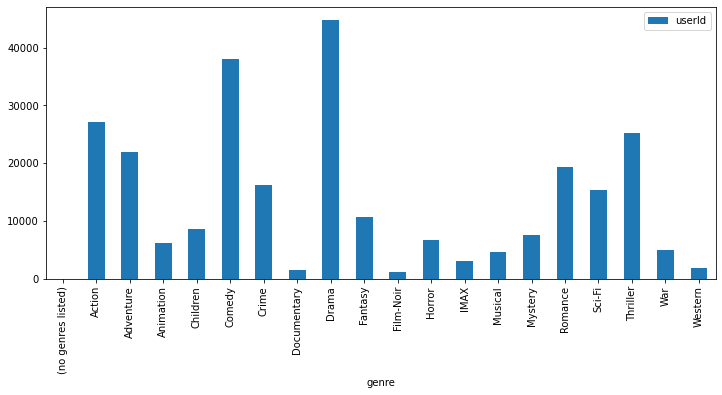

In [54]:
df_customer_profile[df_customer_profile['ratings'] > 0]\
[['genre', 'userId']]\
.groupby('genre').count()\
.plot(kind='bar', figsize=(12,5));

Some genres are very popular like `Drama` and `Comedy` but some others are less popular but still relevant for some users like me and the content-based approach was able to capture this very well.

### 3.3.3 - Model Based - User-Item Matrix Factorization

Matrix Factorization techniques are widely used on RecSys field and have already been considered the state of the art at some relatively recent point. The Netflix Prize winner used a Matrix Factorization technique as one of the pieces of the hybrid solution and the same algorithm will be test in this document.

There are different types of Matrix Factorization implementions and in this section we are trying out some of them from a great library called [lenskit](https://pypi.org/project/lenskit/)

In [55]:
from lenskit.algorithms.funksvd import FunkSVD 
from lenskit.algorithms.als import BiasedMF
#from lenskit.algorithms.item_knn import ItemItem
#from lenskit.algorithms.user_knn import UserUser
from lenskit.algorithms.implicit import BPR

In [56]:
df_train_data = df_ratings[['userId', 'movieId', 'ratings']]
df_train_data.columns = ['user', 'item', 'rating']

In [57]:
def get_lenskit_recommendations(clf, k=10):
    exp = clf.predict_for_user(test_user, df_movies['movieId'].unique().tolist())
    exp.loc[user_seen_movies] = 0.0
    recs_exp = exp.sort_values(ascending=False).index[:k]
    
    return df_movies[(df_movies['movieId'].isin(recs_exp))]

In [58]:
funk_svd_clf = FunkSVD(features=50,random_state=0)

In [59]:
funk_svd_clf.fit(df_train_data)

In [60]:
get_lenskit_recommendations(funk_svd_clf, k=10)

,movieId,title,genres
48,50,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"
284,318,"Shawshank Redemption, The (1994)","[Crime, Drama]"
472,527,Schindler's List (1993),"[Drama, War]"
695,858,"Godfather, The (1972)","[Crime, Drama]"
734,913,"Maltese Falcon, The (1941)","[Film-Noir, Mystery]"
746,926,All About Eve (1950),[Drama]
786,969,"African Queen, The (1951)","[Adventure, Comedy, Romance, War]"
977,1221,"Godfather: Part II, The (1974)","[Crime, Drama]"
1501,1939,"Best Years of Our Lives, The (1946)","[Drama, War]"
8202,98491,Paperman (2012),"[Animation, Comedy, Romance]"


In [61]:
#item_item_clf = ItemItem(nnbrs=30)

In [62]:
#item_item_clf.fit(df_train_data)

In [63]:
#get_lenskit_recommendations(item_item_clf, k=10)

In [64]:
#user_user_clf = UserUser(nnbrs=30)

In [65]:
#user_user_clf.fit(df_train_data)

In [66]:
#get_lenskit_recommendations(user_user_clf, k=10)

In [67]:
mf_clf = BiasedMF(features=50, method='cd')

In [68]:
mf_clf.fit(df_train_data)

In [69]:
get_lenskit_recommendations(mf_clf, k=10)

,movieId,title,genres
266,296,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
931,1172,Cinema Paradiso (Nuovo cinema Paradiso) (1989),[Drama]
1501,1939,"Best Years of Our Lives, The (1946)","[Drama, War]"
1869,2359,Waking Ned Devine (a.k.a. Waking Ned) (1998),[Comedy]
2152,2690,"Ideal Husband, An (1999)","[Comedy, Romance]"
2503,3111,Places in the Heart (1984),[Drama]
4057,5301,Bite the Bullet (1975),"[Action, Adventure, Western]"
7424,73290,Hachiko: A Dog's Story (a.k.a. Hachi: A Dog's ...,[Drama]
8202,98491,Paperman (2012),"[Animation, Comedy, Romance]"
8967,140152,Dreamcatcher (2015),"[Children, Crime, Documentary]"


In [70]:
bpr_clf = BPR(factors=30)

In [71]:
bpr_clf.fit(df_train_data)

In [72]:
get_lenskit_recommendations(bpr_clf, k=10)

,movieId,title,genres
3871,4993,"Lord of the Rings: The Fellowship of the Ring,...","[Adventure, Fantasy]"
4372,5903,Equilibrium (2002),"[Action, Sci-Fi, Thriller]"
4603,6365,"Matrix Reloaded, The (2003)","[Action, Adventure, Sci-Fi, Thriller, IMAX]"
5026,7153,"Lord of the Rings: The Return of the King, The...","[Action, Adventure, Drama, Fantasy]"
5091,7293,50 First Dates (2004),"[Comedy, Romance]"
5624,8957,Saw (2004),"[Horror, Mystery, Thriller]"
6916,58559,"Dark Knight, The (2008)","[Action, Crime, Drama, IMAX]"
6944,59315,Iron Man (2008),"[Action, Adventure, Sci-Fi]"
6966,59784,Kung Fu Panda (2008),"[Action, Animation, Children, Comedy, IMAX]"
7575,79132,Inception (2010),"[Action, Crime, Drama, Mystery, Sci-Fi, Thrill..."


BPR presented the best results so far (at least subjectively speaking) ! 
Some of the movies I've already seen and liked but intentionally let them out of my ratings just to check whether some would be recommended for me. Another great thing was about the release year from the movies above, BPR seems to learn it as a feature too.

## 3.3.3.1 - Spark
[Spark](https://spark.apache.org/) is one of the most used framework to deal with Big Data and parallel processing and it has great library to work with Machine Learning algorithms running on this distributed enviroment. 

Below you can find the list of available algorithms extracted from [Spark MLlib URL](https://spark.apache.org/mllib/)

#### Algorithms
MLlib contains many algorithms and utilities.

ML algorithms include:

* Classification: logistic regression, naive Bayes,...
* Regression: generalized linear regression, survival regression,...
* Decision trees, random forests, and gradient-boosted trees
* **Recommendation: alternating least squares (ALS)**
* Clustering: K-means, Gaussian mixtures (GMMs),...
* Topic modeling: latent Dirichlet allocation (LDA)
* Frequent itemsets, association rules, and sequential pattern mining

Let's check this ALS algorithm...

In [73]:
from pyspark import SparkContext, Row
from pyspark.sql import SparkSession, SQLContext
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [74]:
sp_context = SparkContext().getOrCreate()
sp_session = SparkSession(sp_context)

In [75]:
sp_session = SparkSession(sp_context)

In [76]:
sql_context = SQLContext(sp_context, sp_session)

In [77]:
def getRatingsRowRDD(row):
    
    return Row(userId=int(row['userId']), 
               movieId=int(row['movieId']), 
               rating=float(row['ratings']))


In [78]:
df_movie_ratings = sql_context.createDataFrame(df_ratings)

In [79]:
df_movie_ratings.head(10)

[Row(userId=672, movieId=673, ratings=3.5, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=1274, ratings=3.0, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=1580, ratings=3.0, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=1591, ratings=3.0, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=1682, ratings=4.5, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=1917, ratings=5.0, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=2571, ratings=5.0, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=3793, ratings=4.0, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=4643, ratings=4.0, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24)),
 Row(userId=672, movieId=5219, ratings=4.5, timestamp=datetime.datetime(2016, 10, 16, 15, 57, 24))]

In [80]:
(training, test) = df_movie_ratings.randomSplit([0.9, 0.1])

In [81]:
test_user_sp_ds = sql_context.createDataFrame(pd.DataFrame([[int(test_user)]], columns=['userId']))

In [82]:
als = ALS(maxIter=5,
          rank=10,
          regParam=0.1,
          numItemBlocks=50,
          userCol="userId",
          itemCol="movieId",
          ratingCol="ratings",
          coldStartStrategy="drop",
         implicitPrefs=True)

In [83]:
model = als.fit(training)

In [84]:
exp_5 = model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse",
                                labelCol="ratings",
                                predictionCol="prediction")

rmse = evaluator.evaluate(exp_5)

print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 2.8770929217692562


In [85]:
#Training with full dataset
model = als.fit(df_movie_ratings)

In [86]:
recs_exp_5 = model.recommendForUserSubset(test_user_sp_ds, 10)

In [88]:
testuser_exp_5_recs = recs_exp_5.collect()

In [89]:
recs = [m.movieId for m in testuser_exp_5_recs[0]['recommendations']]

In [90]:
df_movies[df_movies['movieId'].isin(recs)]

,movieId,title,genres
284,318,"Shawshank Redemption, The (1994)","[Crime, Drama]"
321,356,Forrest Gump (1994),"[Comedy, Drama, Romance, War]"
2062,2571,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]"
2374,2959,Fight Club (1999),"[Action, Crime, Drama, Thriller]"
2860,3578,Gladiator (2000),"[Action, Adventure, Drama]"
3871,4993,"Lord of the Rings: The Fellowship of the Ring,...","[Adventure, Fantasy]"
4395,5952,"Lord of the Rings: The Two Towers, The (2002)","[Adventure, Fantasy]"
5026,7153,"Lord of the Rings: The Return of the King, The...","[Action, Adventure, Drama, Fantasy]"
6916,58559,"Dark Knight, The (2008)","[Action, Crime, Drama, IMAX]"
7575,79132,Inception (2010),"[Action, Crime, Drama, Mystery, Sci-Fi, Thrill..."


The result seems pretty reasonable for me! I had to tune a little bit some hyperparameters which cost a significantly increase (the lower the better in this case) on ratings prediction accuracy (RMSE), but the generated list is way better than the previous one at least for the test user.

We've already talked about the trade-off between Ratings Prediction x Top N Recommendations and I certainly would perform more tests on this. Considering it is built on Spark Framework which is known to be widely used in production enviroments in many huge companies and it is maintained by [Apache](https://www.apache.org/), it makes a really reliable, powerful and scalable solution and these are good things to consider when you're planning to deploy something to your environment. 

Therefore from the results above I think it's worth testing different parameter sets and check the outcomes for more users as well as using an objective evaluation metric to compare to other approaches

In [91]:
sp_context.stop()

### 3.3.3.2 - Deep Learning - AutoEnconders

Deep Learning is being tested in many different fields with very robust and efficient algorithms, overcoming the known solutions so far and bringing evolution in areas like image recognition, self-drive cars, natural language processing (NLP) and also Recommender Systems.

On this [awesome post](https://github.com/marlesson/recsys_autoencoders) we can check a solution using [AutoEncoders](https://en.wikipedia.org/wiki/Autoencoder#:~:text=An%20autoencoder%20is%20a%20type,to%20ignore%20signal%20%E2%80%9Cnoise%E2%80%9D) to extract users preferences generating good recommendations.

Part of this post was tested in here:

In [92]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Model,Sequential

In [93]:
def autoEncoder(X):
    
    model = Sequential()
    model.add(Input(shape=(X.shape[1],),name='UserScore'))
    model.add(Dense(512, activation='selu', name='EncLayer1'))
    model.add(Dense(256, activation='selu', name='LatentSpace'))
    model.add(Dropout(0.3, name='Dropout'))
    model.add(Dense(512, activation='selu', name='DecLayer1'))
    model.add(Dense(X.shape[1], activation='linear', name='UserScorePred'))
    
    return model

In [94]:
df_ratings_aux =  df_ratings.copy()
df_ratings_aux['ratings'] = df_ratings_aux['ratings'].astype('float32') 
df_ratings_aux = df_ratings_aux.pivot(index='userId', columns='movieId', values='ratings').fillna(0)

In [95]:
X = df_ratings_aux.values
Y = df_ratings_aux.values

In [96]:
model = autoEncoder(X)

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
EncLayer1 (Dense)            (None, 512)               4642304   
_________________________________________________________________
LatentSpace (Dense)          (None, 256)               131328    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
DecLayer1 (Dense)            (None, 512)               131584    
_________________________________________________________________
UserScorePred (Dense)        (None, 9066)              4650858   
Total params: 9,556,074
Trainable params: 9,556,074
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(optimizer=Adam(lr=0.0001), loss='mse')

In [99]:
hist = model.fit(x=X, y=Y, 
                 epochs=10, 
                 batch_size=64,
                 shuffle=True,
                 validation_split=0.1)

Train on 604 samples, validate on 68 samples
Epoch 1/10
604/604 [==============================] - 10s 16ms/sample - loss: 0.2310 - val_loss: 0.1863
Epoch 2/10
604/604 [==============================] - 4s 7ms/sample - loss: 0.2115 - val_loss: 0.1751
Epoch 3/10
604/604 [==============================] - 4s 6ms/sample - loss: 0.1940 - val_loss: 0.1619
Epoch 4/10
604/604 [==============================] - 4s 6ms/sample - loss: 0.1785 - val_loss: 0.1539
Epoch 5/10
604/604 [==============================] - 4s 6ms/sample - loss: 0.1697 - val_loss: 0.1502
Epoch 6/10
604/604 [==============================] - 4s 7ms/sample - loss: 0.1635 - val_loss: 0.1478
Epoch 7/10
604/604 [==============================] - 6s 10ms/sample - loss: 0.1586 - val_loss: 0.1456
Epoch 8/10
604/604 [==============================] - 3s 5ms/sample - loss: 0.1545 - val_loss: 0.1436
Epoch 9/10
604/604 [==============================] - 3s 5ms/sample - loss: 0.1503 - val_loss: 0.1411
Epoch 10/10
604/604 [=============

In [100]:
#Predict new Matrix Interactions, set score zero on seen movies
new_matrix = model.predict(X) * (X == 0)

In [101]:
# Converting the reconstructed matrix back to a Pandas DataFrame
df_new_users_items_matrix = pd.DataFrame(new_matrix,
                                        columns = df_ratings_aux.columns,
                                        index= df_ratings_aux.index)

In [102]:
df_new_users_items_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.193595,0.025113,-0.065107,-0.081100,0.020313,0.161938,0.014157,-0.064383,-0.036993,-0.009150,...,0.001583,-0.103139,0.003741,0.047388,0.055618,-0.109920,0.004066,-0.049402,-0.004861,-0.054164
2,1.028608,0.877700,0.402187,0.034990,0.404340,0.524839,0.549183,-0.005376,0.264323,0.000000,...,0.092972,0.003973,0.020365,-0.014681,0.001222,0.044946,-0.077278,0.128575,0.009055,-0.047018
3,0.898305,0.423872,0.108600,-0.044139,0.095579,0.239009,0.146793,0.055606,0.062544,0.332309,...,-0.124542,0.002230,-0.062759,0.109531,0.049560,-0.049913,-0.111592,0.000425,-0.045954,-0.215367
4,2.000247,0.567205,0.252114,0.322319,0.584063,0.892139,0.501803,0.074379,0.043622,0.000000,...,-0.240565,0.063445,-0.055246,-0.077202,-0.134997,-0.012308,-0.012764,-0.005331,0.035603,0.146394
5,1.458643,0.694981,0.000000,0.218893,0.430248,0.458370,0.304518,0.037013,0.251998,0.945795,...,0.023510,0.102836,0.042973,-0.281686,0.042118,0.029429,0.067756,-0.113656,0.115177,0.044804


In [103]:
recs_ae = df_new_users_items_matrix.loc[test_user].nlargest(10).index

In [104]:
df_movies[df_movies['movieId'].isin(recs_ae)]

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
232,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]"
266,296,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]"
284,318,"Shawshank Redemption, The (1994)","[Crime, Drama]"
954,1197,"Princess Bride, The (1987)","[Action, Adventure, Comedy, Fantasy, Romance]"
994,1240,"Terminator, The (1984)","[Action, Sci-Fi, Thriller]"
3871,4993,"Lord of the Rings: The Fellowship of the Ring,...","[Adventure, Fantasy]"
5026,7153,"Lord of the Rings: The Return of the King, The...","[Action, Adventure, Drama, Fantasy]"
5626,8961,"Incredibles, The (2004)","[Action, Adventure, Animation, Children, Comedy]"
6916,58559,"Dark Knight, The (2008)","[Action, Crime, Drama, IMAX]"


Even with a small dataset and using default parameters for AutoEncoder model, the results were pretty good for the test user. Many of them are similar to Spark Solution and it seems to capture the user's taste very well. 

it could be more flexible and powerful than ALS as it's possible to add some layers of the Neural Network to improve it, but in contrast it needs additional knowlege about deep learning tuning and its applications to not `overfit` your recommender (because of its complexity and hability to capture complex relationships, Neural Networks are prone to overfitting if we don't take some security measures).

Maybe it could be considered some kind of advanced matrix factorization techique that solves the problem of not having the user on the trained matrix, as with AutoEncoders you can still pass a unknown user's vector interactions as input and it will be able to generate recommendations anyway.

## 3.3.3.3 - Deep Learning - WORD2VEC


The [Word2vec](https://en.wikipedia.org/wiki/Word2vec) algorithm is a recent(2013) and powerful algorithm created and published by Google to deal with NLP tasks, that basically uses the context around the words to understand "meanings" and create word embeddings.

Based on the idea from [this post](https://towardsdatascience.com/using-word2vec-for-music-recommendations-bb9649ac2484) we can use this as an embedding creator to recommender systems associating movies in the same context, so I'm going to use movies rated as 4 or 5 stars for the same user as a "sentence" of liked movies and use this as a training set for Word2Vec so we can generate predictions like "Who liked this movie also likes this one"
The [gensim library](https://radimrehurek.com/gensim/models/word2vec.html) makes it easy to implement this in python


In [105]:
from gensim.models.word2vec import Word2Vec

In [106]:
df_aux = df_ratings.merge(df_movies, on='movieId')

In [107]:
df_aux = df_aux[df_aux['ratings'] >= 4.0][['userId', 'title']]

In [108]:
df_aux.sort_values(by='userId',inplace=True)

In [109]:
movies = []
for u in df_aux['userId'].unique().tolist():
    movie_list = list(df_aux[df_aux['userId'] == u]['title'])
    movies.append(movie_list)

In [110]:
#Context to use in the Model Training phase...
movies[:1]

[['Tron (1982)',
  'French Connection, The (1971)',
  'Cinema Paradiso (Nuovo cinema Paradiso) (1989)']]

In [111]:
#Using 50 factors...
w2v_model = Word2Vec(movies, size=50, window=10, min_count=1, workers=2, iter=30, sg=0, hs=1, seed=0)

In [112]:
def get_input_vector(consumed_items: list):
    user_input_vector = None
    arr_aux = []
    
    for item in consumed_items:
        arr_aux.append(w2v_model.wv[item])

    user_input_vector = np.average(arr_aux, axis=0)

    return user_input_vector

In [113]:
# Representation of Shrek (2001) movie in the model's embeddings
w2v_model.wv['Shrek (2001)']

array([-0.41447565, -1.4009926 , -2.7115405 ,  2.2450814 , -0.29997602,
       -3.051877  , -2.7926931 ,  0.68447846, -1.2513301 , -0.3497819 ,
       -0.7346919 , -0.0093342 , -2.100095  , -0.3455386 ,  1.3994967 ,
       -0.9963535 , -1.032889  , -0.7441372 ,  0.6124658 ,  0.2657062 ,
       -0.37605384,  0.45695204, -0.40918866, -1.4590149 ,  0.26743048,
        0.93970674, -2.249431  , -0.8843871 ,  0.4503927 ,  1.1354984 ,
       -0.31766158, -0.5637655 ,  0.6021394 , -2.8717988 ,  1.5063577 ,
       -1.249833  ,  0.7870019 ,  0.8364381 ,  3.5126038 , -0.14729926,
       -0.26681566, -0.80598897, -1.4744409 ,  0.9750054 ,  0.79144984,
       -2.6408923 ,  1.290147  ,  1.1309161 , -0.8155447 ,  1.62486   ],
      dtype=float32)

In [114]:
# Representation Shrek 2 movie in the model's embeddings
w2v_model.wv['Shrek 2 (2004)']

array([-1.0460179 , -0.5812059 , -0.9555964 ,  0.58461386, -0.09766452,
       -1.7727141 , -1.3364677 , -0.82286644, -0.9838642 ,  0.15252805,
       -0.49388474,  0.6396166 , -1.2432984 , -1.4928148 ,  1.2025553 ,
        0.45396677,  0.5955542 , -0.37439537,  0.27664623, -0.91226315,
       -0.9400424 , -0.62062573, -0.7460149 , -1.3022864 , -0.5811798 ,
        1.0987093 , -1.2172358 ,  0.6487593 ,  0.60162467,  1.0784601 ,
        0.62120146,  0.25760704, -0.84666777, -1.3321415 ,  1.1268585 ,
        0.0030959 , -0.3599796 ,  0.08262873,  0.8636017 ,  0.86271155,
       -0.74872845, -1.3762822 , -0.04130628,  0.6081541 ,  0.2392758 ,
       -1.911874  , -0.5115108 ,  0.8420922 ,  0.0792881 ,  0.5421011 ],
      dtype=float32)

In [115]:
#Shrek 1 and 2 are supposed to be close (the higher the closer between 0 and 1)
cosine_similarity([w2v_model.wv['Shrek (2001)']], 
                  [w2v_model.wv['Shrek 2 (2004)']])

array([[0.6716833]], dtype=float32)

In [116]:
def get_recommendations_by_interactions(interactions, k=10):
    
    user_input_vector = get_input_vector(interactions)
    
    recs = w2v_model.wv.most_similar(positive=[user_input_vector], topn=100)
    
    final_recs = []
    
    for i in recs:
        if not i[0] in interactions:
            final_recs.append(i)
    
    return pd.DataFrame(final_recs[:k], columns=['title', 'score']).sort_values(by='score', ascending=False)

In [117]:
def get_recommendations_by_user(user_id, k=10):
    
    test_user_likes = df_aux[df_aux['userId'] ==user_id]['title'].values.tolist()
    
    return get_recommendations_by_interactions(test_user_likes, k=k)

In [118]:
get_recommendations_by_user(test_user)

,title,score
0,"Hobbit: The Desolation of Smaug, The (2013)",0.875628
1,Iron Man (2008),0.870405
2,Pirates of the Caribbean: The Curse of the Bla...,0.863647
3,Harry Potter and the Half-Blood Prince (2009),0.862563
4,"Bourne Ultimatum, The (2007)",0.859553
5,"Last Samurai, The (2003)",0.852791
6,"Lord of the Rings: The Fellowship of the Ring,...",0.850260
7,Pirates of the Caribbean: Dead Man's Chest (2006),0.849272
8,Harry Potter and the Sorcerer's Stone (a.k.a. ...,0.849212
9,How to Train Your Dragon (2010),0.844427


Using word2Vec techinque to come up with something like "Who liked these movies also liked these ones" seems to work but I would say it could be used as complement of another more personalized approach. Even with a small corpus it has already captured some good relationships and maybe it would be good to use it in a hybrid recommender.

Another good use of this recommender is when we have less data about a certain user. We could simply use the movies he/she has clicked on (or any other kind of interest signal) as input and it would still have some good recommendations.

For example:
Which movies would be recommended for someone who has just clicked for more details about the movies `Shrek 1`, `Shrek 2` and `Toy Story (1995)`?

In [119]:
get_recommendations_by_interactions(['Shrek (2001)', 'Shrek 2 (2004)', 'Toy Story (1995)'])

,title,score
0,"Green Mile, The (1999)",0.823591
1,Harry Potter and the Sorcerer's Stone (a.k.a. ...,0.808731
2,"Lord of the Rings: The Return of the King, The...",0.794285
3,Finding Nemo (2003),0.792304
4,"Game, The (1997)",0.775567
5,Spider-Man (2002),0.766376
6,"Matrix Reloaded, The (2003)",0.761370
7,"Lord of the Rings: The Two Towers, The (2002)",0.740857
8,"Social Network, The (2010)",0.728248
9,Rain Man (1988),0.726942


We can see the relavance of `Finding Nemo` movie which is also animation and it would make sense to be related to `Shrek` and `Toy Story` inputs, in addition to other less obvious recommendations. 

I think with a larger corpus these kind of relationships would be better represented, but having in mind in this case we are using "Who **likes** movie A also likes Movie B" approach, which means that a user has given 4+ stars for both movies A and B, thereby in the same ID we could have one single user that sometimes are watching movies with the kids and sometimes on his/her own and that would make the same user gives good ratings for kids and adults movies at the same time, hence some "obscure" recommendations could be generated anyway.

## 4. - Evaluation

Now it's time to put it all together, organize the knowledge and impressions we've got from the experiments and evaluate the different approaches explored using an objective metric like `hit rate`, so we can select good candidates for a Hybrid Recommender in the end.

The first thing we need to do is dividing our data into train and test sets and by using the `timestamp` column I'm trying to simulate what would happen in the real world, using previous ratings to predict future ratings, therefore the test set will be stratified by each user and their last 20% ratings.

In [120]:
def get_train_test_data(ratings, test_size=0.1):
    
    users = ratings['userId'].unique()
    
    train_list = []
    test_list = []
    
    for u in users:
        user_data = ratings[ratings['userId'] == u].sort_values(by='timestamp')
        test_index = int(np.ceil(len(user_data) * test_size))
        test_data = user_data.iloc[test_index:]
        train_data = user_data.iloc[:test_index]
        
        train_list.append(train_data)
        test_list.append(test_data)
    
    return pd.concat(train_list), pd.concat(test_list)

In [121]:
df_training, df_test_data = get_train_test_data(df_ratings, 0.2)

In [122]:
df_training = df_training[['userId', 'movieId', 'ratings']]
df_test_data = df_test_data[['userId', 'movieId', 'ratings']]
df_training.columns = ['user', 'item', 'rating']
df_test_data.columns = ['user', 'item', 'rating']

In [123]:
df_test_data.shape

(79769, 3)

In [124]:
df_training.shape

(20262, 3)

Now we need to create an easier way to get recommendation from the several classifiers we've tried in the experiments and evaluating each of them with the same metrics. That's why we need the following wrapper functions with each algorithm's specific implementations but having the outcomes in the same format

In [125]:
## Function to create a stoplist to not recommend seen movies for the users
def get_user_seen_movies(user, interactions, flg_name=False):
    if not flg_name:
        return interactions[interactions['user'] == user]['item'].unique().tolist()
    else:
        df_aux = interactions.merge(df_movies, left_on='item', right_on='movieId')
        return df_aux[df_aux['user'] == user]['title'].unique().tolist()

In [126]:
def calculate_user_hit_rate(recs, test_data, k):
    
    #Considering only Liked movies
    aux_test_data = test_data[test_data['rating'] >= 4.0]
    precision = len(aux_test_data[aux_test_data['item'].isin(recs['item'])])
    #precision = len([i for i in recs['item'].unique() if i in aux_test_data['item'].unique()])
    return precision / k

In [127]:
def generate_customers_profile(training_data):
    
    df_customer_profile = df_movies_aux[['movieId',
                                         'genre']].merge(training_data,
                                                         left_on='movieId',
                                                         right_on='item')
    
    df_customer_profile_pvt = df_customer_profile[['user',
                                                   'genre',
                                                   'rating']].groupby(['user',
                                                                        'genre']).sum().reset_index()
    
    df_customer_profile_pvt = df_customer_profile_pvt.pivot_table(index='user',
                                                              columns = 'genre',
                                                              values='rating').fillna(0)
    
    return df_customer_profile_pvt

In [128]:
def build_w2v_dataset(training_data):
    
    df_aux = training_data.merge(df_movies, left_on='item', right_on='movieId')
    df_aux = df_aux[df_aux['rating'] >= 4.0][['user', 'title']]
    df_aux.sort_values(by='user',inplace=True)
    
    interactions = []
    for u in df_aux['user'].unique().tolist():
        movie_list = list(df_aux[df_aux['user'] == u]['title'])
        interactions.append(movie_list)
    
    return interactions
    

In [129]:
def build_autoencoder_model(training_data):
    
    df_ratings_aux =  training_data.copy()
    df_ratings_aux['rating'] = df_ratings_aux['rating'].astype('float32') 
    df_ratings_aux = df_ratings_aux.pivot(index='user', columns='item', values='rating').fillna(0)

    X = df_ratings_aux.values
    Y = df_ratings_aux.values
    
    model = Sequential()
    model.add(Input(shape=(X.shape[1],),name='UserScore'))
    model.add(Dense(512, activation='selu', name='EncLayer1'))
    model.add(Dense(256, activation='selu', name='LatentSpace'))
    model.add(Dropout(0.3, name='Dropout'))
    model.add(Dense(512, activation='selu', name='DecLayer1'))
    model.add(Dense(X.shape[1], activation='linear', name='UserScorePred'))
    
    model.compile(optimizer=Adam(lr=0.0001), loss='mse')


    hist = model.fit(x=X, y=Y,
                     epochs=10,
                     batch_size=64,
                     shuffle=True,
                     validation_split=0.1)
    
    new_matrix = model.predict(X) * (X == 0)

    df_new_users_items_matrix = pd.DataFrame(new_matrix,
                                            columns = df_ratings_aux.columns,
                                            index= df_ratings_aux.index)

    return df_new_users_items_matrix


In [130]:
df_popularity = df_ratings.merge(df_movies, 
                                 on='movieId')[['ratings',
                                                'movieId',
                                                'userId',
                                                'title']].groupby(['movieId',
                                                                   'title']).agg({'ratings': 'mean',
                                                                                 'userId': 'count'}).reset_index()

In [131]:
df_popularity['score'] = df_popularity['ratings'] * df_popularity['userId']

In [132]:
df_popularity['rank'] = df_popularity['score'].rank(ascending=False)

In [133]:
def get_diversity_serendipity(recs):
    movies_recommended = df_movie_sim.loc[recs, recs]
    diversity = np.sum(movies_recommended.mean(axis=1)) / len(recs)
    serendipity = df_popularity[df_popularity['movieId'].isin(recs)]['rank'].mean()
    
    return 1-diversity, serendipity

In [134]:
#BPR Algorithm
def get_BPR_recs(clf, user, stoplist, k=10):
    
    recs = clf.predict_for_user(user, df_movies['movieId'].unique().tolist())
    recs.loc[stoplist] = 0.0
    recs_exp = recs.sort_values(ascending=False).index[:k]
    final_recs = df_movies[(df_movies['movieId'].isin(recs_exp))].copy()
    final_recs['user'] = u
    final_recs.columns = ['item', 'movie', 'genre', 'user']
    
    return final_recs

In [135]:
# Content-based tests
def get_cb_recs(user, stoplist, profile_data, k=10):
    
    sims = get_user_item_distance(profile_data)
    
    recs = pd.DataFrame(sims,
                        index=df_movies_pvt.index,
                        columns = ['sim']).sort_values(by='sim',
                                                       ascending=False)[:k].index
    final_recs = df_movies[(df_movies['movieId'].isin(recs)) & \
                           ~(df_movies['movieId'].isin(stoplist))].copy()
    
    final_recs['user'] = u
    final_recs.columns = ['item', 'movie', 'genre', 'user']
    
    return final_recs


In [136]:
#Word2Vec algorithm
def get_word2vec_recs(model, user, user_interactions, k=10):
    
    #Only known movies
    interactions_aux = [ w for w in user_interactions if w in list(model.wv.vocab)]

    recs = model.wv.most_similar(positive=interactions_aux, topn=100)
    
    final_recs = []

    for r in recs:
        if r[0] not in interactions_aux:
            final_recs.append(r)

    final_recs = pd.DataFrame(final_recs, columns=['title', 'score']).merge(df_movies, on='title')
    
    final_recs['user'] = user
    
    final_recs.columns = ['movie', 'score', 'item', 'genres', 'user']
    
    return final_recs.sort_values(by='score', ascending=False)[:k]
    

In [137]:
#Autoencoder algorithm
def get_autoencoder_recs(user, predictions, stoplist, k=10):
    
    recs_ae = predictions.loc[user].nlargest(k).index
    
    final_recs = df_movies[(df_movies['movieId'].isin(recs_ae)) & ~(df_movies['movieId'].isin(stoplist))].copy()
    
    final_recs['user'] = user
    
    final_recs.columns = ['item', 'movie', 'genre','user']
    
    return final_recs

### Pipelines

In [138]:
def run_HR_BPR_pipeline(user_list, training_data, test_data, k=10):
    
    print("Starting BPR pipeline...")
        
    bpr_clf = BPR(factors=50)
    bpr_clf.fit(training_data)
        
    hits = 0
    diversity = 0
    serendipity = 0
    user_count = len(user_list)
        
    print("BPR fit finished...")
        
        
    for u in tqdm(user_list):
        stoplist = get_user_seen_movies(u, training_data)
        recs = get_BPR_recs(bpr_clf, u, stoplist, k)
        # A hit is when we recommend something we know the user has liked (rating >= 4)
        hits += calculate_user_hit_rate(recs, test_data[test_data['user'] == u], k)
        div, ser = get_diversity_serendipity(recs['item'])
        diversity += div
        serendipity += ser
        
    return (hits / user_count, diversity / user_count, serendipity / user_count)

In [139]:
def run_HR_CB_pipeline(user_list, training_data, test_data, k=10):
    
    print("Starting to build customers profile...")
    
    profile_data = generate_customers_profile(training_data)
    hits = 0
    diversity = 0
    serendipity = 0
    user_count = len(user_list)
   
    print("Customer profile generation finished...")
    
    print(f'Starting users recommendations: {len(user_list)} users found!')
    
    for u in tqdm(user_list):
        stoplist = get_user_seen_movies(u, training_data)
        recs = get_cb_recs(u, stoplist, profile_data.loc[u].values, k)
        # A hit is when we recommend something we know the user has liked (rating >= 4)
        hits += calculate_user_hit_rate(recs, test_data[test_data['user'] == u], k)
        div, ser = get_diversity_serendipity(recs['item'])
        diversity += div
        serendipity += ser
        
    return (hits / user_count, diversity / user_count, serendipity / user_count)

In [140]:
def run_HR_W2V_pipeline(user_list, training_data, test_data, k=10):
    
    print("building training dataset...")
    
    ## training
    train_dataset = build_w2v_dataset(training_data)
    
    print("training dataset ready...")
    
    print("Starting to build embeddings...")
    model = Word2Vec(train_dataset, size=50, window=10, min_count=1, workers=2, iter=30, sg=0, hs=1, seed=0)
    print("Model finished...")
    
    hits = 0
    diversity = 0
    serendipity = 0
    user_count = len(user_list)
    
    print(f'Starting users recommendations: {len(user_list)} users found!')
    
    for u in tqdm(user_list):
        interactions = get_user_seen_movies(u, training_data, flg_name=True)
        recs = get_word2vec_recs(model,u, interactions, k)
        # A hit is when we recommend something we know the user has liked (rating >= 4)
        hits += calculate_user_hit_rate(recs, test_data[test_data['user'] == u], k)
        div, ser = get_diversity_serendipity(recs['item'])
        diversity += div
        serendipity += ser
        
    return (hits / user_count, diversity / user_count, serendipity / user_count)

In [141]:
def run_HR_AE_pipeline(user_list, training_data, test_data, k=10):
    
    print("building autoencoder...")
    predictions = build_autoencoder_model(training_data)
    print("building model step finished...")
    
    hits = 0
    diversity = 0
    serendipity = 0
    user_count = len(user_list)
    
    print(f'Starting users recommendations: {len(user_list)} users found!')
    
    for u in tqdm(user_list):
        stoplist = get_user_seen_movies(u, training_data, flg_name=True)
        recs = get_autoencoder_recs(u, predictions, stoplist, k)
        # A hit is when we recommend something we know the user has liked (rating >= 4)
        hits += calculate_user_hit_rate(recs, test_data[test_data['user'] == u], k)
        div, ser = get_diversity_serendipity(recs['item'])
        diversity += div
        serendipity += ser
        
    return (hits / user_count, diversity / user_count, serendipity / user_count)

In [142]:
def evaluate_recommenders(rec_list, training_data, test_data, k=10):
    
    final_results = defaultdict(dict)
    
    #Only known users from the training set will be considered...
    user_list = test_data[test_data['user'].isin(training_data['user'])]['user'].unique()
    
    if 'BPR' in rec_list:
        
        bpr_hit_rate, bpr_div, bpr_ser = run_HR_BPR_pipeline(user_list, training_data, test_data, k)
        final_results['BPR']['Hit Rate'] = bpr_hit_rate
        final_results['BPR']['Diversity'] = bpr_div
        final_results['BPR']['AVG Rank'] = bpr_ser
    
    if 'CB' in rec_list:
        
        cb_hit_rate, cb_div, cb_ser = run_HR_CB_pipeline(user_list, training_data, test_data, k)
        final_results['CB']['Hit Rate'] = cb_hit_rate
        final_results['CB']['Diversity'] = cb_div
        final_results['CB']['AVG Rank'] = cb_ser        
    
    if 'W2V' in rec_list:
        w2v_hit_rate, w2v_div, w2v_ser = run_HR_W2V_pipeline(user_list, training_data, test_data, k)
        final_results['W2V']['Hit Rate'] = w2v_hit_rate
        final_results['W2V']['Diversity'] = w2v_div
        final_results['W2V']['AVG Rank'] = w2v_ser
        
    if 'AE' in rec_list:
        ae_hit_rate, ae_div, ae_ser = run_HR_AE_pipeline(user_list, training_data, test_data, k)
        final_results['AE']['Hit Rate'] = ae_hit_rate
        final_results['AE']['Diversity'] = ae_div        
        final_results['AE']['AVG Rank'] = ae_ser
        
    return final_results


In [143]:
final_outcomes = evaluate_recommenders(['BPR',
                                         'CB',
                                        'W2V',
                                        'AE'], df_training, df_test_data, k=10)
#final_outcomes = evaluate_recommenders(['BPR'], df_training, df_test_data, k=10)

Starting BPR pipeline...


  0%|          | 3/672 [00:00<00:26, 25.49it/s]


BPR fit finished...


  0%|          | 0/672 [00:00<?, ?it/s]

Starting to build customers profile...
Customer profile generation finished...
Starting users recommendations: 672 users found!


100%|██████████| 672/672 [00:31<00:00, 21.53it/s]


building training dataset...
training dataset ready...
Starting to build embeddings...


  1%|          | 4/672 [00:00<00:21, 30.68it/s]

Model finished...
Starting users recommendations: 672 users found!


100%|██████████| 672/672 [00:28<00:00, 23.94it/s]


building autoencoder...
Train on 604 samples, validate on 68 samples
Epoch 1/10
604/604 [==============================] - 5s 8ms/sample - loss: 0.1611 - val_loss: 0.1207
Epoch 2/10
604/604 [==============================] - 2s 3ms/sample - loss: 0.1436 - val_loss: 0.1139
Epoch 3/10
604/604 [==============================] - 3s 5ms/sample - loss: 0.1317 - val_loss: 0.1089
Epoch 4/10
604/604 [==============================] - 3s 5ms/sample - loss: 0.1227 - val_loss: 0.1047
Epoch 5/10
604/604 [==============================] - 2s 4ms/sample - loss: 0.1152 - val_loss: 0.1012
Epoch 6/10
604/604 [==============================] - 2s 3ms/sample - loss: 0.1094 - val_loss: 0.0981
Epoch 7/10
604/604 [==============================] - 2s 3ms/sample - loss: 0.1040 - val_loss: 0.0953
Epoch 8/10
604/604 [==============================] - 2s 3ms/sample - loss: 0.0995 - val_loss: 0.0927
Epoch 9/10
604/604 [==============================] - 2s 3ms/sample - loss: 0.0953 - val_loss: 0.0904
Epoch 10/10
6

  0%|          | 3/672 [00:00<00:23, 28.42it/s]

building model step finished...
Starting users recommendations: 672 users found!


100%|██████████| 672/672 [00:15<00:00, 42.15it/s]


In [144]:
df_final_outcomes = pd.DataFrame(final_outcomes)

In [145]:
df_final_outcomes.head()

,BPR,CB,W2V,AE
Hit Rate,0.132440,0.012946,0.089137,0.110565
Diversity,0.596608,0.283526,0.631342,0.653849
AVG Rank,213.840327,3816.491700,475.361830,494.353274


By the table above we can see that indeed BPR had the best performance but is not as diverse as AE or W2V. The Content-based approach seems to recommend many "obscure" recommendations from Diversity's perspective and it had a low Hit Rate. We can use this table to select the candidates for the Hybrid recommender.

In [146]:
from lenskit.metrics.topn import precision, recall
from lenskit.topn import RecListAnalysis

In [147]:
def evaluator(user_list, k):
    final_list = []
    
    bpr_clf = BPR(factors=30)
    bpr_clf.fit(df_training)

    
    evaluator = RecListAnalysis()
    evaluator.add_metric(precision, name='precision_at_10')
    evaluator.add_metric(recall, name='recall_at_10')
    
    for u in user_list:
        testing = df_test_data[df_test_data['user'] == u][['user', 'item']]
        recs = bpr_clf.recommend(u, n=k)
        recs['user'] = u
        recs = recs[['user', 'item']]
        
        evals = evaluator.compute(recs, testing)
        
        final_list.append(evals)
        
    
    return final_list

In [148]:
recs = evaluator(df_test_data['user'].unique(), k=10)

In [149]:
bpr_clf.recommend(test_user, n=10).merge(df_movies, left_on='item', right_on='movieId')

,item,score,movieId,title,genres
0,58559,3.678711,58559,"Dark Knight, The (2008)","[Action, Crime, Drama, IMAX]"
1,79132,3.330491,79132,Inception (2010),"[Action, Crime, Drama, Mystery, Sci-Fi, Thrill..."
2,7293,3.154107,7293,50 First Dates (2004),"[Comedy, Romance]"
3,59315,3.028965,59315,Iron Man (2008),"[Action, Adventure, Sci-Fi]"
4,7153,2.919460,7153,"Lord of the Rings: The Return of the King, The...","[Action, Adventure, Drama, Fantasy]"
5,4993,2.912037,4993,"Lord of the Rings: The Fellowship of the Ring,...","[Adventure, Fantasy]"
6,6365,2.909879,6365,"Matrix Reloaded, The (2003)","[Action, Adventure, Sci-Fi, Thriller, IMAX]"
7,8957,2.894021,8957,Saw (2004),"[Horror, Mystery, Thriller]"
8,59784,2.887845,59784,Kung Fu Panda (2008),"[Action, Animation, Children, Comedy, IMAX]"
9,5903,2.883407,5903,Equilibrium (2002),"[Action, Sci-Fi, Thriller]"


In [150]:
pd.concat(recs).describe()

,nrecs,precision_at_10,recall_at_10
count,672.0,672.000000,672.000000
mean,10.0,0.296131,0.050770
std,0.0,0.273548,0.076125
min,10.0,0.000000,0.000000
25%,10.0,0.100000,0.004617
50%,10.0,0.200000,0.025479
75%,10.0,0.500000,0.055556
max,10.0,1.000000,0.562500


> If I had to choose one from all of this to try first it would be BPR algorithm that subjectively and objectively speaking had a good performance on this dataset. 

#### Exporting the best model to further usage

In [151]:
import joblib as jb

In [152]:
#Exporting a classfier and data used to create an API with Flask to serve the recommendations
jb.dump(bpr_clf, 'bpr_clf.pkl')
df_movies.to_csv('movies',index=False)
df_ratings.to_csv('ratings', index=False)

##  5. Hybrid Recommender

We've seen BPR with the best performance considering Hit Rate metric but with lower diversity compared to W2V, Content Based and AutoEncoders.

Let's try to build a hybrid recommender using BPR, W2V and CB with respective weights in the final recommendations as a refinment to "vote" for each item depending on the weights we give for each of the recommender

In [153]:
df_hybrid_test = df_ratings[['userId', 'movieId', 'ratings']].copy()
df_hybrid_test.columns = ['user', 'item', 'rating']

In [154]:
def BPR_hybrid(user, training_data, k=10):
    
    stoplist = get_user_seen_movies(user, training_data)
    recs = get_BPR_recs(bpr_clf, user, stoplist, k)
    
    return recs[~recs['item'].isin(stoplist)]

In [155]:
def W2V_hybrid(user, training_data, k=10):
    
    interactions = get_user_seen_movies(user, training_data, flg_name=True)
    recs = get_word2vec_recs(w2v_model,user, interactions, k)
    
    return recs[~recs['item'].isin(interactions)]

In [156]:
def CB_hybrid(user, training_data, k=10):
    
    profile_data = generate_customers_profile(training_data)
    
    stoplist = get_user_seen_movies(user, training_data)
    recs = get_cb_recs(user, stoplist, profile_data.loc[u].values, k)
        
    return recs[~recs['item'].isin(stoplist)]

In [157]:
## Test Hybrid approach
def get_hybrid_recs(user, training_data, weights=[1.2, 0.8, 1], k=10):
    
    final_result = defaultdict(float)
    final_result_item = defaultdict(float)
    
    bpr_weight = weights[0]
    cb_weight = weights[1]
    w2v_weight = weights[2]
    
    ## recs from BPR
    bpr_recs = BPR_hybrid(user, training_data, k)
    
    for m,i in bpr_recs[['movie','item']].values:
        final_result[m] += bpr_weight
        final_result_item[i] += bpr_weight
        
    ## recs from CB
    cb_recs = CB_hybrid(user, training_data, k)
    
    for m,i in cb_recs[['movie', 'item']].values:
        final_result[m] += cb_weight
        final_result_item[i] += cb_weight
    
    ## recs from W2v
    w2v_recs = W2V_hybrid(user, training_data, k)
    
    for m, i in w2v_recs[['movie', 'item']].values:
        final_result[m] += w2v_weight
        final_result_item[i] += w2v_weight
        
    df_results = pd.DataFrame([final_result]).T.reset_index()
    df_results['item'] = final_result_item.keys()
    
    df_results.columns = ['movie', 'score', 'item']

    return df_results.nlargest(k, 'score')
    #return df_results

In [158]:
## Position 1 = BPR weight |  Position 2: CB weight | Position 3: W2V weight
weights=[0.5, 0.1, 0.4]

In [159]:
get_hybrid_recs(test_user, df_hybrid_test, weights, 10)

,movie,score,item
7,Iron Man (2008),0.9,59315
2,"Matrix Reloaded, The (2003)",0.6,6365
9,Inception (2010),0.6,79132
0,"Lord of the Rings: The Fellowship of the Ring,...",0.5,4993
1,Equilibrium (2002),0.5,5903
3,"Lord of the Rings: The Return of the King, The...",0.5,7153
4,50 First Dates (2004),0.5,7293
5,Saw (2004),0.5,8957
6,"Dark Knight, The (2008)",0.5,58559
8,Kung Fu Panda (2008),0.5,59784


In [160]:
BPR_hybrid(test_user, df_hybrid_test, 10)

,item,movie,genre,user
3871,4993,"Lord of the Rings: The Fellowship of the Ring,...","[Adventure, Fantasy]",672
4372,5903,Equilibrium (2002),"[Action, Sci-Fi, Thriller]",672
4603,6365,"Matrix Reloaded, The (2003)","[Action, Adventure, Sci-Fi, Thriller, IMAX]",672
5026,7153,"Lord of the Rings: The Return of the King, The...","[Action, Adventure, Drama, Fantasy]",672
5091,7293,50 First Dates (2004),"[Comedy, Romance]",672
5624,8957,Saw (2004),"[Horror, Mystery, Thriller]",672
6916,58559,"Dark Knight, The (2008)","[Action, Crime, Drama, IMAX]",672
6944,59315,Iron Man (2008),"[Action, Adventure, Sci-Fi]",672
6966,59784,Kung Fu Panda (2008),"[Action, Animation, Children, Comedy, IMAX]",672
7575,79132,Inception (2010),"[Action, Crime, Drama, Mystery, Sci-Fi, Thrill...",672


In [161]:
CB_hybrid(test_user, df_hybrid_test, 10)

,item,movie,genre,user
4603,6365,"Matrix Reloaded, The (2003)","[Action, Adventure, Sci-Fi, Thriller, IMAX]",672
4880,6934,"Matrix Revolutions, The (2003)","[Action, Adventure, Sci-Fi, Thriller, IMAX]",672
6691,52722,Spider-Man 3 (2007),"[Action, Adventure, Sci-Fi, Thriller, IMAX]",672
7004,60684,Watchmen (2009),"[Action, Drama, Mystery, Sci-Fi, Thriller, IMAX]",672
7526,77561,Iron Man 2 (2010),"[Action, Adventure, Sci-Fi, Thriller, IMAX]",672
7575,79132,Inception (2010),"[Action, Crime, Drama, Mystery, Sci-Fi, Thrill...",672
7760,85261,Mars Needs Moms (2011),"[Action, Adventure, Animation, Children, Comed...",672
8284,101076,G.I. Joe: Retaliation (2013),"[Action, Adventure, Sci-Fi, Thriller, IMAX]",672
8336,103042,Man of Steel (2013),"[Action, Adventure, Fantasy, Sci-Fi, IMAX]",672
8783,122886,Star Wars: Episode VII - The Force Awakens (2015),"[Action, Adventure, Fantasy, Sci-Fi, IMAX]",672


In [162]:
W2V_hybrid(test_user, df_hybrid_test, 10)

,movie,score,item,genres,user
0,"Last Samurai, The (2003)",0.856360,7143,"[Action, Adventure, Drama, War]",672
1,"Hobbit: The Desolation of Smaug, The (2013)",0.853065,106489,"[Adventure, Fantasy, IMAX]",672
2,Pirates of the Caribbean: The Curse of the Bla...,0.841363,6539,"[Action, Adventure, Comedy, Fantasy]",672
3,Harry Potter and the Sorcerer's Stone (a.k.a. ...,0.831585,4896,"[Adventure, Children, Fantasy]",672
4,How to Train Your Dragon (2010),0.825958,76093,"[Adventure, Animation, Children, Fantasy, IMAX]",672
5,Iron Man (2008),0.819679,59315,"[Action, Adventure, Sci-Fi]",672
6,"Beautiful Mind, A (2001)",0.817915,4995,"[Drama, Romance]",672
7,Constantine (2005),0.817363,31696,"[Action, Fantasy, Horror, Thriller]",672
8,Harry Potter and the Half-Blood Prince (2009),0.813318,69844,"[Adventure, Fantasy, Mystery, Romance, IMAX]",672
9,Pirates of the Caribbean: Dead Man's Chest (2006),0.812266,45722,"[Action, Adventure, Fantasy]",672


> Comparing the hybrid outcomes to the individual recommendations, I would say that it is subjectively better as it rearranged the items in a better way for my own tastes, but it is still very close to BPR results considering the weights assigned to the items, but using this approach we can try different sets of weights in addition to use a `rank` metric such as NDCG to evaluate the performance regarding the positions for all users.

### 5.1 - Evaluating Hybrid Recommender with Hit Rate

In [163]:
def evaluate_Hybrid_HR(user_list, training_data, test_data, weights, k=10):
     
    hits = 0
    diversity = 0
    serendipity = 0
    user_count = len(user_list)
    
    print(f'Starting users recommendations: {len(user_list)} users found!')
    
    for u in tqdm(user_list):
        stoplist = get_user_seen_movies(u, training_data, flg_name=True)
        recs = get_hybrid_recs(u, training_data, weights, k)
        # A hit is when we recommend something we know the user has liked (rating >= 4)
        hits += calculate_user_hit_rate(recs, test_data[test_data['user'] == u], k)
        div, ser = get_diversity_serendipity(recs['item'])
        diversity += div
        serendipity += ser
        
    return (hits / user_count, diversity / user_count, serendipity / user_count)
    
    #return hits / user_count

In [164]:
hybrid_evaluation = evaluate_Hybrid_HR(df_training['user'].unique(),
                                       df_training,
                                       df_test_data,
                                       weights,
                                       10)

  0%|          | 0/672 [00:00<?, ?it/s]

Starting users recommendations: 672 users found!


100%|██████████| 672/672 [01:55<00:00,  5.80it/s]


In [165]:
hybrid_evaluation

(0.3044642857142855, 0.5598453070966327, 346.5380952380953)

The best thing we could do here is performing online tests comparing this hybrid x another recommender (BPR which has the best results could be a candidate) so we can have user's real feedback to check whether the position and also mixing different types of recommendations are making any (significant) difference for the user.

## 6. Conclusions

After all this discussions we can see that Recommender Systems is not just about predicting ratings and it has many aspects to work on both from business and technical standpoints. It is a very *customer-driven* field, therefore we have to be constantly evaluating it with Online/field tests getting feedback from real users. It is like a `Lego` that you put many blocks together, each one with its own goal so you can build a whole **system** that is able to help people finding relevant items as well as helping companies to make more money, but it is not just about profit, it is about retain customers by knowing what they like and need. It is a win-win game after all.

With all the goals set and considering the aspects discussed in this document to evaluate the quality and ROI of recommendations (always centralized in the user's needs), people might stick with you longer and maybe create an "emotional bond" with your brand because of the feeling that you know their habits almost better than themselves.

# References

* https://gab41.lab41.org/recommender-systems-its-not-all-about-the-accuracy-562c7dceeaff#.5exl13wqv
* https://queirozf.com/entries/evaluation-metrics-for-ranking-problems-introduction-and-examples
* https://www.udemy.com/course/building-recommender-systems-with-machine-learning-and-ai/
* https://kojinoshiba.com/recsys-cold-start/
* https://github.com/marlesson/recsys_autoencoders
* https://towardsdatascience.com/using-word2vec-for-music-recommendations-bb9649ac2484